In [1]:
import gymnasium as gym
import numpy as np
import gridworld
import matplotlib.pyplot as plt

def map_to_state(grid_position, grid)-> int:
    max_cols = grid[1]
    return grid_position[0] * max_cols + grid_position[1]

# Politica eps-GREEDY
def eps_greedy(Qs, epsilon) -> int:
    N = len(Qs)

    # Azione random scelta con probabilità epsilon
    if np.random.rand() < epsilon:
        action = np.random.randint(0,N)
        
    # Azione greedy scelta con probabilità 1-epsilon
    else:
        action = greedy(Qs)
        
    return action

# Politica GREEDY: Sceglie sempre l'azione con il valore massimo di Q(s,a)
def greedy(Qs) -> int:

    Qmax = np.max(Qs)
    id = np.where(Qs == Qmax)[0]
    
    if len(id) > 1:
        action = np.random.choice(id)
    else:
        action = id[0]
    return action

def SARSA(Q, s1, a1, r, s2, a2, alpha, gamma, done):
    # Update di Q se non mi trovo in uno stato terminale
    if not done:
        update = Q[s1][a1] + alpha * (r + gamma * Q[s2][a2] - Q[s1][a1])

    # Update di Q quando mi trovo in uno stato terminale
    else: 
        update = Q[s1][a1] + alpha * (r + gamma * 0.0 - Q[s1][a1])
    return update
                                  
                                  

In [14]:
# Parametri decadimento epsilon
max_epsilon = 1.0               
min_epsilon = 0.01            
num_episodes = 2000
decay_rate = 0.0025

# Numero di reward aggiuntive
n_reward = 2

# Parametri di learning
gamma = 1
alpha = 0.1

# Vettore contenente gli stati
states = np.array([], dtype=int)

# Dimensioni griglia
max_rows = 4
max_cols = 12
grid = [max_rows, max_cols]

# Trasformo tutte le posizioni della griglia in stati 
for i in range(max_rows):
    for j in range(max_cols):
        curr_state = map_to_state([i,j], grid)
        states = np.append(states, curr_state)

# Dizionario contenente le Action Value Function per ogni stato
Q ={}
for s in states:
    Q[s] = np.zeros(4)

# Variabili raccolta dati
total_reward_ep = np.zeros(num_episodes)
total_steps = np.zeros(num_episodes)
goal = 0

env = gym.make('Cliff-v0', spawn_reward=True, reward_seed=3, n_reward=n_reward)

for ep in range(num_episodes):
    # Decadimento epsilon
    epsilon = np.max([min_epsilon, max_epsilon * np.exp(-decay_rate * ep)])
    # Init ambiente
    curr_cell, info = env.reset()
    curr_state = map_to_state(curr_cell, grid)
    # Scelta prima azione
    curr_action = eps_greedy(Q[curr_state], epsilon)
   
    done = False
    
    while not done:
        # Eseguo l'azione
        next_cell, reward, terminated, truncated, info = env.step(curr_action)
        done = terminated or truncated
        next_state = map_to_state(next_cell, grid)
        
        # Scelto la prossima azione
        next_action = eps_greedy(Q[next_state], epsilon)
        
        # Update SARSA
        Q[curr_state][curr_action] = SARSA(Q, curr_state, curr_action, reward, next_state, next_action, alpha, gamma, done)
        
        # Passo al prossimo step
        curr_state = next_state
        curr_action = next_action

        # Salvo dati step
        if done and reward == -1:
            goal += 1
        total_reward_ep[ep] += reward
        total_steps[ep] += 1
        
    # Savlo dati episodio 
    if ep < num_episodes - 1:
        total_steps[ep+1] = total_steps[ep]
        
    if ep % 100 == 0 and ep!= 0:
        print("Episode number: %d Epsilon value: %f" % (ep, epsilon))
        print("Goal reached %d times" % goal)
env.close()

0
1.0
Goal reached 0 times
100
0.7788007830714049
Goal reached 0 times
200
0.6065306597126334
Goal reached 0 times
300
0.4723665527410147
Goal reached 1 times
400
0.36787944117144233
Goal reached 49 times
500
0.2865047968601901
Goal reached 146 times
600
0.22313016014842982
Goal reached 246 times
700
0.17377394345044514
Goal reached 346 times
800
0.1353352832366127
Goal reached 446 times
900
0.10539922456186433
Goal reached 475 times
1000
0.0820849986238988
Goal reached 475 times
1100
0.06392786120670757
Goal reached 475 times
1200
0.049787068367863944
Goal reached 481 times
1300
0.03877420783172201
Goal reached 558 times
1400
0.0301973834223185
Goal reached 619 times
1500
0.023517745856009107
Goal reached 704 times
1600
0.01831563888873418
Goal reached 801 times
1700
0.014264233908999256
Goal reached 901 times
1800
0.011108996538242306
Goal reached 1001 times
1900
0.01
Goal reached 1101 times


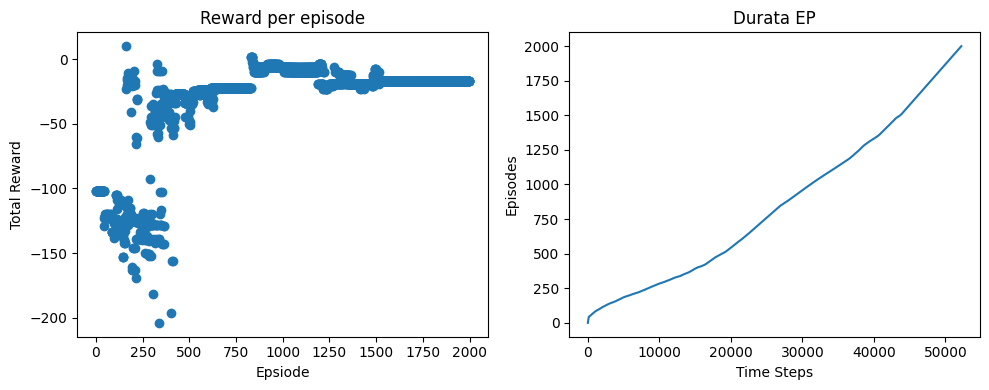

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(np.arange(len(total_reward_ep)), total_reward_ep)

# Aggiungi etichette agli assi
ax1.set_xlabel('Epsiode')
ax1.set_ylabel('Total Reward')
ax1.set_title('Reward per episode')
# Secondo grafico (solo punti) - Ax2
ax2.plot(total_steps, np.arange(len(total_steps)))
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Episodes')
ax2.set_title('Durata EP')

# Mostra entrambi i grafici
plt.tight_layout()
plt.show()

In [17]:
env = gym.make('Cliff-v0', render_mode='human', spawn_reward=True, reward_seed=3, n_reward=n_reward)
for ep in range(3):
    curr_cell, info = env.reset()
    curr_state = map_to_state(curr_cell, grid)
    curr_action = eps_greedy(Q[curr_state], epsilon)
    done = False
    tot_reward = 0
    while not done:
        
        next_cell, reward, terminated, truncated, info = env.step(curr_action)
        done = terminated or truncated
        tot_reward += reward
        if not done:
            next_state = map_to_state(next_cell, grid)
            next_action = eps_greedy(Q[next_state], 0)
            curr_state = next_state
            curr_action = next_action
            
    print("Info: " + str(info))
    print("Total reward: " + str(tot_reward))
env.close()

Info: {'goal': True, 'reward_collected': 0}
Total reward: -17
Info: {'goal': True, 'reward_collected': 0}
Total reward: -17
Info: {'goal': True, 'reward_collected': 0}
Total reward: -17
